In [68]:
import tweepy
import json
from dotenv import load_dotenv
import os
import numpy as np
import networkx as nx


load_dotenv()
C_KEY = os.getenv('C_KEY')
C_SECRET = os.getenv('C_SECRET')
A_TOKEN_KEY = os.getenv('A_TOKEN_KEY')
A_TOKEN_SECRET = os.getenv('A_TOKEN_SECRET')
auth = tweepy.OAuthHandler(C_KEY, C_SECRET)
auth.set_access_token(A_TOKEN_KEY, A_TOKEN_SECRET)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [26]:
users = []
tweets = tweepy.Cursor(api.search_tweets, q="politics", result_type="popular", count=100, lang="en", tweet_mode="extended").pages(5)
for page in tweets:
    for entry in page:
        # print(entry.full_text)
        # print(f'AUTHOR: {entry.user.screen_name}')
        # print('-----------------')
        # print(entry.user._json)
        if entry.user._json['followers_count'] > 10000:
            users.append(entry.user._json['screen_name'])
print(len(users))

74


In [69]:
G = nx.DiGraph()
for user in users:
    G.add_node(user)
    followers = api.get_followers(screen_name=user, count=20)
    for follower in followers:
            G.add_edge(follower._json["screen_name"], user)

G.nodes(data=True)

Rate limit reached. Sleeping for: 893
Rate limit reached. Sleeping for: 892
Rate limit reached. Sleeping for: 895
Rate limit reached. Sleeping for: 893


NodeDataView({'CarolineLucas': {}, 'Sisipupa': {}, 'jacobdelsan': {}, 'LynneMa81705174': {}, 'theoriginallaw': {}, 'katbaker230': {}, 'whosaidthatthen': {}, 'Welly_springer': {}, 'criticalvas': {}, '0x_idizer': {}, 'antsidford': {}, 'MazzaBlackwell': {}, 'AlasdairMack66': {}, 'BilalAf28953319': {}, 'Ryeinstein': {}, 'kememe1': {}, 'benmatrouk': {}, 'foroghrahmani85': {}, 'SP0RTSFANDAN': {}, 'Saundy2023': {}, 'jgandiabuleo': {}, 'tribelaw': {}, 'glaspey_dana': {}, 'Steveg1115': {}, 'Shamvita4': {}, 'VegasGu26015264': {}, 'LoriDiGisi': {}, 'Barbara74834689': {}, 'MichaelDFinn1': {}, 'AM62111180': {}, 'HadroJen': {}, 'Nikita108Joynes': {}, 'sharons62813701': {}, 'JeanKolakowski': {}, 'djhepcatnyc': {}, 'inquireofficial': {}, 'tgfromma': {}, '725Stanley': {}, 'tweetznglory': {}, 'NarcyMom': {}, 'XPlugh': {}, 'mVryywVuLqhfY': {}, 'NoLieWithBTC': {}, 'BleueFaerie': {}, 'munkbass': {}, 'Not_the_Chad': {}, 'Mary67743663': {}, 'LydiaLatri': {}, 'Sanasoy1': {}, 'BARKATMED91': {}, 'junicla63': {}

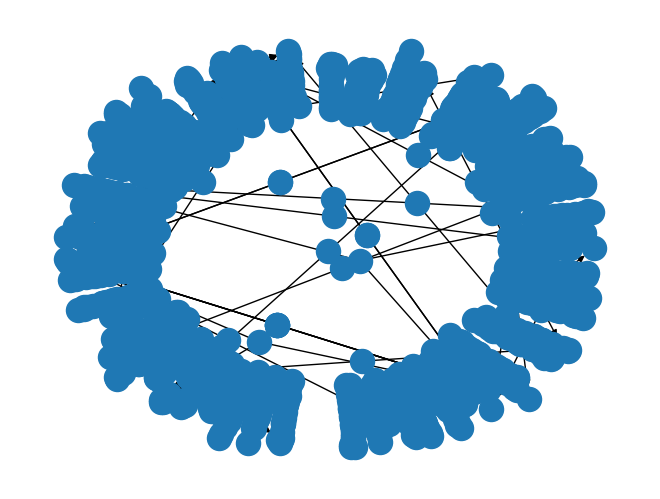

In [70]:

nx.draw(G)


In [73]:
G.number_of_nodes()

1406

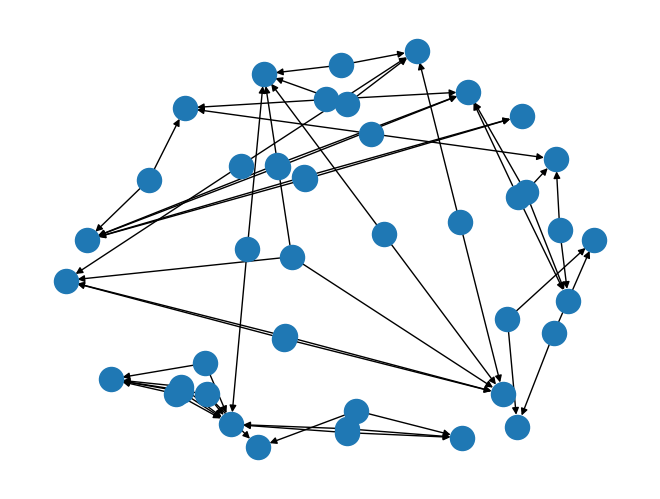

In [76]:
G_tmp = nx.k_core(G, 2)
G_tmp.number_of_nodes()
nx.draw(G_tmp)

In [91]:
G_tmp.degree()
for hi in G_tmp.predecessors("ElieNYC"):
    print(hi)

AnixLeslie
Sorry0kEric
otha_bright
5000tball
BobbyMa56063908
whitexmas53
tykev
DSwizzleDude


In [96]:
with open('epic-graph.csv', 'w') as f:
    for hi in G_tmp.edges():
        f.write(f'{hi[0]}\t{hi[1]}\n')

